In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import timeit
warnings.filterwarnings("ignore")

: 

In [ ]:
df = pd.read_csv('input/Hybrid_final.csv')

In [ ]:
df.head()

,u,g,r,i,z,redshift,l,b,distance,x_coord,y_coord,z_coord,u-r,class
0,21.2671,18.98994,17.6719,17.06646,16.6774,-0.000023,284.336468,61.768371,-0.099902,0.099636,0.007288,-0.000272,3.5952,2
1,18.8800,18.80000,18.3600,18.55000,18.4200,1.475710,62.957277,-37.922099,4405.359728,3791.864046,-2220.578481,313.037694,0.5200,1
2,19.5700,17.57000,16.9500,17.18000,16.9600,0.054158,143.822916,-63.736497,231.461920,214.509154,86.431852,-9.485690,2.6200,0
3,21.0900,18.99000,17.2900,17.81000,16.9000,0.160380,103.134137,-58.333575,668.936316,667.358786,30.345903,34.455367,3.8000,0
4,18.8300,18.76000,18.7200,18.55000,18.8300,1.018750,106.034273,64.941866,3409.584813,-1972.267316,-880.782956,2638.115163,0.1100,1


In [ ]:
df['class'].value_counts()

1    11104
0    10845
2     8051
Name: class, dtype: int64

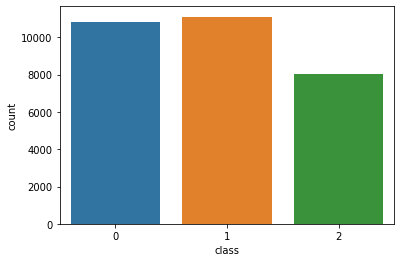

In [ ]:
df['class'].head(10)
ax = sns.countplot(x='class',data=df)

In [ ]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)


,class,redshift
2,2,-0.000012
1,1,1.678846
0,0,0.227121


In [ ]:
X_df = df.drop(['class',"l","b","distance","x_coord","y_coord","z_coord","u-r"],axis=1).values
y_df = df['class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.30, random_state=44, shuffle =True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier(n_estimators=200)

start_time_train = timeit.default_timer()
random_forest.fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for RBF: ' + str(upsampling_elapsed))

Training time for RBF: 6.815027899996494


In [ ]:
y_pred = random_forest.predict(X_test)

Test_acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  98.522


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3345
           1       0.99      0.98      0.98      3293
           2       0.99      1.00      1.00      2362

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [ ]:
confusion_matrix(y_test, y_pred)

array([[3288,   45,   12],
       [  75, 3217,    1],
       [   0,    0, 2362]], dtype=int64)

# Lamost Test

In [ ]:
df = pd.read_csv('Test/40879.csv')

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,obsid,ra,dec,z,class,mag1,mag2,mag3,mag4,mag5
0,101001,332.202274,-2.056767,-0.000139,STAR,18.78,17.12,16.42,16.15,15.97
1,101002,332.471576,-2.085015,0.000119,STAR,20.91,18.10,16.66,16.05,15.67
2,101005,332.535456,-2.116436,-0.000251,STAR,18.87,17.58,17.00,16.79,16.64
3,101007,332.512558,-1.841408,-0.000169,STAR,22.89,20.09,18.57,17.35,16.72
4,101008,332.368745,-1.955771,0.000087,STAR,18.25,16.64,15.97,15.77,15.64


In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['z'])
df['distance']= r.value

df.head()

,obsid,ra,dec,z,class,mag1,mag2,mag3,mag4,mag5,l,b,distance
0,101001,332.202274,-2.056767,-0.000139,STAR,18.78,17.12,16.42,16.15,15.97,58.660186,-43.716767,-0.599845
1,101002,332.471576,-2.085015,0.000119,STAR,20.91,18.10,16.66,16.05,15.67,58.851828,-43.949394,0.515369
2,101005,332.535456,-2.116436,-0.000251,STAR,18.87,17.58,17.00,16.79,16.64,58.869974,-44.019337,-1.084017
3,101007,332.512558,-1.841408,-0.000169,STAR,22.89,20.09,18.57,17.35,16.72,59.156336,-43.835957,-0.729873
4,101008,332.368745,-1.955771,0.000087,STAR,18.25,16.64,15.97,15.77,15.64,58.910001,-43.789687,0.377950


In [ ]:
df= df.dropna()

In [ ]:
df[['z','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

,class,z
2,STAR,-0.000207
1,QSO,1.590710
0,GALAXY,0.143196


In [ ]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,obsid,ra,dec,z,class,mag1,mag2,mag3,mag4,mag5,l,b,distance,x_coord,y_coord,z_coord
0,101001,332.202274,-2.056767,-0.000139,STAR,18.78,17.12,16.42,16.15,15.97,58.660186,-43.716767,-0.599845,-0.530281,0.279558,0.021528
1,101002,332.471576,-2.085015,0.000119,STAR,20.91,18.10,16.66,16.05,15.67,58.851828,-43.949394,0.515369,0.456717,-0.238040,-0.018750
2,101005,332.535456,-2.116436,-0.000251,STAR,18.87,17.58,17.00,16.79,16.64,58.869974,-44.019337,-1.084017,-0.961188,0.499607,0.040033
3,101007,332.512558,-1.841408,-0.000169,STAR,22.89,20.09,18.57,17.35,16.72,59.156336,-43.835957,-0.729873,-0.647145,0.336702,0.023453
4,101008,332.368745,-1.955771,0.000087,STAR,18.25,16.64,15.97,15.77,15.64,58.910001,-43.789687,0.377950,0.334650,-0.175183,-0.012899


In [ ]:
df['u-r'] = df['mag1']-df['mag4']

In [ ]:
df['class'] = df['class'].astype('category').cat.codes

In [ ]:
y_df = df['class']

In [ ]:
columns_titles = ["mag1","mag2","mag4","mag3","mag5","z"]
data=df.reindex(columns=columns_titles)

In [ ]:
X_df = data.values

In [ ]:
y_pred = random_forest.predict(X_df)

In [ ]:
Test_acc_random_forest = round(random_forest.score(X_df, y_df) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  99.952


In [ ]:
print(classification_report(y_df, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       0.99      0.97      0.98       112
           2       1.00      1.00      1.00      7462

    accuracy                           1.00      8252
   macro avg       1.00      0.99      0.99      8252
weighted avg       1.00      1.00      1.00      8252



In [ ]:
confusion_matrix(y_df, y_pred)

array([[ 677,    1,    0],
       [   3,  109,    0],
       [   0,    0, 7462]], dtype=int64)

# SDSS Test

In [ ]:
df = pd.read_csv('Test/sdss.csv')

In [ ]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,94,301,6,93,4.830000e+18,GALAXY,0.399651,4286,55499,322
1,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,94,4.300000e+17,GALAXY,0.032125,382,51816,368
2,1.240000e+18,15.896126,1.264845,20.14134,19.28787,19.04397,18.96897,18.79573,94,301,6,274,4.460000e+17,STAR,-0.000821,396,51816,370
3,1.240000e+18,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,94,301,6,275,7.540000e+17,GALAXY,0.312048,670,52520,374
4,1.240000e+18,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,94,301,6,275,7.540000e+17,GALAXY,0.200468,670,52520,367


In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['z'])
df['distance']= r.value

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distance
0,1.240000e+18,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,94,301,...,93,4.830000e+18,GALAXY,0.399651,4286,55499,322,79.914118,-53.382197,10889.870466
1,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,...,94,4.300000e+17,GALAXY,0.032125,382,51816,368,79.999146,-53.417022,10737.784722
2,1.240000e+18,15.896126,1.264845,20.14134,19.28787,19.04397,18.96897,18.79573,94,301,...,274,4.460000e+17,STAR,-0.000821,396,51816,370,129.295662,-61.456728,10923.741026
3,1.240000e+18,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,94,301,...,275,7.540000e+17,GALAXY,0.312048,670,52520,374,129.523245,-61.451201,10804.270479
4,1.240000e+18,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,94,301,...,275,7.540000e+17,GALAXY,0.200468,670,52520,367,129.553380,-61.441430,10892.221138


In [ ]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

,class,redshift
2,STAR,0.000095
1,QSO,1.683068
0,GALAXY,0.265592


In [ ]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,redshift,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord
0,1.240000e+18,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,94,301,...,0.399651,4286,55499,322,79.914118,-53.382197,10889.870466,10681.369075,-2107.009227,241.133953
1,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,...,0.032125,382,51816,368,79.999146,-53.417022,10737.784722,10534.404562,-2066.284901,238.344241
2,1.240000e+18,15.896126,1.264845,20.14134,19.28787,19.04397,18.96897,18.79573,94,301,...,-0.000821,396,51816,370,129.295662,-61.456728,10923.741026,10503.455416,2991.220279,241.129770
3,1.240000e+18,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,94,301,...,0.312048,670,52520,374,129.523245,-61.451201,10804.270479,10382.967155,2978.231268,237.470296
4,1.240000e+18,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,94,301,...,0.200468,670,52520,367,129.553380,-61.441430,10892.221138,10466.651187,3005.266629,240.970378


In [ ]:
df['u-r'] = df['u']-df['r']

In [ ]:
df['class'] = df['class'].astype('category').cat.codes

In [ ]:
df = df.dropna()

In [ ]:
columns_titles = ["u","g","r","i","z","redshift","class"]
data=df.reindex(columns=columns_titles)

In [ ]:
data

,u,g,r,i,z,redshift,class
0,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,0
1,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,0
2,20.14134,19.28787,19.04397,18.96897,18.79573,-0.000821,2
3,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,0
4,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,0
...,...,...,...,...,...,...,...
995,17.66319,16.67854,16.32029,16.16791,16.07974,0.000040,2
996,17.75165,16.25298,16.01847,15.92379,15.80896,0.000183,2
997,18.63891,17.23935,16.98758,16.88545,16.78316,0.000155,2
998,18.20391,16.74014,16.46841,16.36043,16.23614,0.000175,2


In [ ]:
y_df = data['class']
X_df = data.loc[:, data.columns != 'class'].values

In [ ]:
y_pred = random_forest.predict(X_df)

In [ ]:
Test_acc_random_forest = round(random_forest.score(X_df, y_df) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  97.183


In [ ]:
confusion_matrix(y_df, y_pred)

array([[565,  22,   2],
       [  3,  72,   1],
       [  0,   0, 329]], dtype=int64)

# 98.578 & 99.952 & 97.183